# Script to generate violin plots

In [123]:
# import necessary libraries
import pandas as pd
import seaborn as sb
import os
import glob


# Note that I was really dumb and made 6 folders for each sample (so two samples per folder) with the stored csv files. 
folders = {}
folders['f'+str(1)] = 'a1773'
folders['f'+str(2)] = 'a1894'
folders['f'+str(3)] = 'a551'
folders['f'+str(4)] = 'a711'
folders['f'+str(5)] = 'a783'
folders['f'+str(6)] = 'a931'

# use getcwd to get current directory path
path = os.getcwd()
d = {}
for i in range(1,7):
    # Use glob to get all the csv files in each folder
    d['csv_files'+str(i)] = glob.glob(os.path.join(path+'/'+folders['f'+str(i)], "*.csv"))

      
   

In [124]:
d

{'csv_files1': ['/home/mercedes/pHd/a1773/all_1773_H11_1.csv',
  '/home/mercedes/pHd/a1773/all_1773_H11_2.csv'],
 'csv_files2': ['/home/mercedes/pHd/a1894/all_1894_G3_4.csv',
  '/home/mercedes/pHd/a1894/all_1894_G3_5.csv'],
 'csv_files3': ['/home/mercedes/pHd/a551/all_551_C10_1.csv',
  '/home/mercedes/pHd/a551/all_551_C10_2.csv'],
 'csv_files4': ['/home/mercedes/pHd/a711/all_711_D6_2.csv',
  '/home/mercedes/pHd/a711/all_711_D6_1.csv'],
 'csv_files5': ['/home/mercedes/pHd/a783/all_783_A5_2.csv',
  '/home/mercedes/pHd/a783/all_783_A5_1.csv'],
 'csv_files6': ['/home/mercedes/pHd/a931/all_931_H7_2.csv',
  '/home/mercedes/pHd/a931/all_931_H7_1.csv']}

In [138]:
# I just want the column names
data = pd.read_csv(folders['f3']+'/all_551_C10_1.csv', sep =';')

# Data dataframe to store all samples
Data = pd.DataFrame(columns = data.columns)
Data['Sample'] = 0
Data

,,image,mean Int nuclei,mean Int nuclear membrane,mean Int microtubules,ratio,minimum size nuclei,Sample


In [139]:
# Loop over the folders to get data
for i in range(1,7):
    for j in range(2):
        tmp = pd.read_csv(d['csv_files'+str(i)][j], sep = ';')
        tmp['Sample'] = folders['f'+str(i)]
        Data = pd.concat([tmp,Data],axis =0, )

In [140]:
Data

,,image,mean Int nuclei,mean Int nuclear membrane,mean Int microtubules,ratio,minimum size nuclei,Sample
0,1,931_H7_1,33663.607,42474.449,25017.810,1.262,2000,a931
1,2,931_H7_1,23590.408,40936.297,17542.964,1.735,2000,a931
2,3,931_H7_1,41069.449,54340.664,32834.652,1.323,2000,a931
3,4,931_H7_1,37133.804,41416.549,31214.566,1.115,2000,a931
4,5,931_H7_1,24423.265,40971.392,29594.738,1.678,2000,a931
...,...,...,...,...,...,...,...,...
2,3,1773_H11_1,11471.735,10157.939,14148.454,0.885,2000,a1773
3,4,1773_H11_1,13043.442,11312.611,13902.482,0.867,2000,a1773
4,5,1773_H11_1,13432.575,15027.821,9034.027,1.119,2000,a1773
5,6,1773_H11_1,13338.963,22895.260,14975.052,1.716,2000,a1773


<Axes: xlabel='Sample', ylabel='ratio'>

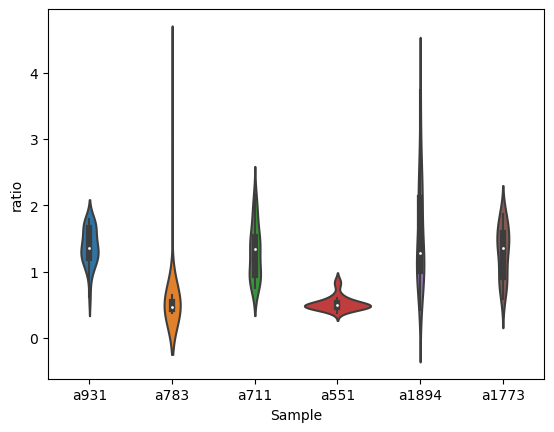

In [133]:
sb.violinplot(data=Data, x="Sample", y="ratio")

<Axes: xlabel='Sample', ylabel='mean Int nuclei'>

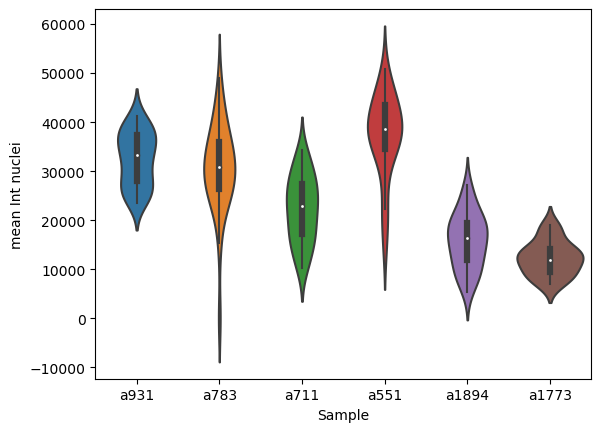

In [134]:
sb.violinplot(data=Data, x="Sample", y="mean Int nuclei")

<Axes: xlabel='Sample', ylabel='mean Int nuclear membrane'>

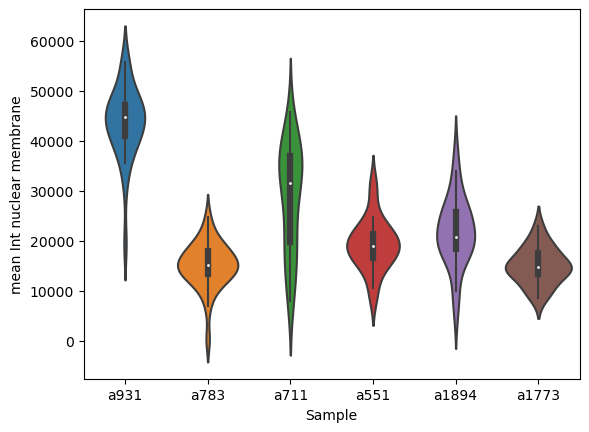

In [135]:
sb.violinplot(data=Data, x="Sample", y="mean Int nuclear membrane")

<Axes: xlabel='Sample', ylabel='mean Int microtubules'>

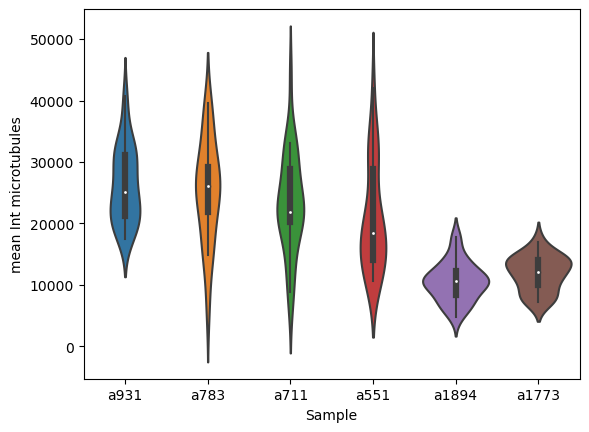

In [136]:
sb.violinplot(data=Data, x="Sample", y="mean Int microtubules")